<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/PyTorch_Temporal_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from torch import nn, optim

import warnings
warnings.filterwarnings('ignore')

In [3]:
torch.manual_seed(42)

###Dataset

In [4]:
data_train = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/petr4_treinamento.csv')
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [5]:
data_train.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']
data_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [6]:
data_test = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/petr4_teste.csv')
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000


In [7]:
data_test.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']
data_test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

### Data Treatment

In [8]:
data_train.shape

(1245, 7)

In [9]:
data_train.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj_Close    3
Volume       3
dtype: int64

In [10]:
data_train = data_train.dropna()
data_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [11]:
data_train.duplicated().sum()

0

In [12]:
data_test.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [13]:
data_test.duplicated().sum()

0

In [14]:
data_train.shape, data_test.shape

((1242, 7), (22, 7))

In [15]:
base_train = data_train.iloc[:,1:2].values
base_train

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [16]:
type(base_train)

numpy.ndarray

In [17]:
base_train_norm = MinMaxScaler(feature_range=(0,1)).fit_transform(base_train)
base_train_norm

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [18]:
X, y = [], []
for i in range(90, base_train_norm.shape[0]):
    X.append(base_train_norm[i-90:i,0])
    y.append(base_train_norm[i,0])
X, y = np.array(X), np.array(y)

In [19]:
X[0]

array([0.76501938, 0.7562984 , 0.78149225, 0.78875969, 0.77083338,
       0.74806197, 0.75436047, 0.75823643, 0.76598837, 0.76598837,
       0.76017437, 0.75872098, 0.75581391, 0.74467054, 0.7374031 ,
       0.7374031 , 0.73498067, 0.75242248, 0.73401163, 0.71656977,
       0.68120155, 0.67538755, 0.67635659, 0.63372098, 0.66521318,
       0.65649225, 0.64680228, 0.66618222, 0.65843028, 0.64970935,
       0.65116274, 0.66424419, 0.67344961, 0.64292631, 0.64486434,
       0.62257747, 0.60949617, 0.60998067, 0.60852713, 0.59593023,
       0.61143411, 0.60222863, 0.64922481, 0.68362398, 0.70687989,
       0.68265509, 0.70978682, 0.70784879, 0.71608527, 0.73643411,
       0.7122093 , 0.7122093 , 0.7194767 , 0.70348832, 0.69525189,
       0.70397287, 0.70397287, 0.69767442, 0.68168605, 0.68168605,
       0.65310078, 0.66618222, 0.64825581, 0.66182175, 0.64341085,
       0.67877902, 0.69137592, 0.66569772, 0.65406982, 0.64292631,
       0.64147292, 0.63565891, 0.67587209, 0.68653106, 0.70300

In [20]:
y[0]

0.7611434108527131

In [21]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [22]:
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

###Building Recorrent Neural Network

### Training Model

In [23]:
class regressor_LSTM(nn.Module):
  def __init__(self):
    super().__init__()

    self.lstm1 = nn.LSTM(input_size=1, hidden_size=100)
    self.lstm2 = nn.LSTM(100, 50)
    self.lstm3 = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout = nn.Dropout(p = 0.3)
    self.linear = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1(X)
    X = self.dropout(X)
    X, _ = self.lstm2(X)
    X = self.dropout(X)
    X, _ = self.lstm3(X)

    X = X[-1]
    X = self.dropout(X)
    X = self.linear(X)

    return X

In [24]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [25]:
regressor = regressor_LSTM()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(regressor.parameters(), lr = 1e-3, alpha = 0.9)

In [26]:
regressor.to(device)

regressor_LSTM(
  (lstm1): LSTM(1, 100)
  (lstm2): LSTM(100, 50)
  (lstm3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [27]:
for epoch in range(100):
    running_loss = 0.
    running_mae = 0.
          
    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = regressor(inputs)
        outputs = outputs.flatten()
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
    
        running_loss += loss.item()
        
        mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(), 
                                  outputs.detach().cpu().numpy().flatten())
        running_mae += mae
        
        
        print('\rEpoch {:3d} --- Loop {:3d} of {:3d}: Cost {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')
    
    
    running_loss /= len(loader)
    running_mae /= len(loader)
    print('Epoch {:3d} --- Cost {:03.6f} --- MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))

Epoch   1 --- Cost 0.046791 --- MAE 0.171083     
Epoch   2 --- Cost 0.021545 --- MAE 0.118916     
Epoch   3 --- Cost 0.012852 --- MAE 0.089161     
Epoch   4 --- Cost 0.010328 --- MAE 0.080467     
Epoch   5 --- Cost 0.008521 --- MAE 0.071649     
Epoch   6 --- Cost 0.008312 --- MAE 0.070534     
Epoch   7 --- Cost 0.006451 --- MAE 0.061912     
Epoch   8 --- Cost 0.006205 --- MAE 0.060418     
Epoch   9 --- Cost 0.005781 --- MAE 0.057182     
Epoch  10 --- Cost 0.005540 --- MAE 0.058333     
Epoch  11 --- Cost 0.005378 --- MAE 0.056875     
Epoch  12 --- Cost 0.004767 --- MAE 0.053876     
Epoch  13 --- Cost 0.005202 --- MAE 0.056387     
Epoch  14 --- Cost 0.004291 --- MAE 0.050509     
Epoch  15 --- Cost 0.003949 --- MAE 0.048547     
Epoch  16 --- Cost 0.004217 --- MAE 0.051233     
Epoch  17 --- Cost 0.003466 --- MAE 0.046464     
Epoch  18 --- Cost 0.003957 --- MAE 0.048994     
Epoch  19 --- Cost 0.003553 --- MAE 0.047272     
Epoch  20 --- Cost 0.003564 --- MAE 0.045824     


###Test data preparation

In [28]:
norm = MinMaxScaler(feature_range=(0,1))

In [29]:
data_test.shape

(22, 7)

In [30]:
test_price = data_test.iloc[:,1]
test_price.shape

(22,)

In [31]:
dataset = pd.concat((data_train.Open, data_test.Open), axis=0)
dataset.shape

(1264,)

In [32]:
inputs = dataset[len(dataset) - len(data_test)- 90:].values.reshape(-1,1)
inputs = norm.fit_transform(inputs)
inputs.shape

(112, 1)

In [33]:
X_test = []
for i in range(90, 112):
    X_test.append(inputs[i-90:i,0])   

X_test = np.array(X_test)

In [34]:
X_test = torch.tensor(X_test, device=device, dtype=torch.float32)

###Prediction

In [35]:
regressor.eval()
predict = regressor.forward(X_test)

In [36]:
predict = predict.detach().cpu().numpy().reshape(-1,1)
predict = norm.inverse_transform(predict)

In [37]:
# checking test and predict value
predict.mean(), test_price.mean()

(17.45066, 17.87454563636364)

In [38]:
print(f"Accuracy Model = {round(predict.mean() / test_price.mean() *100,3)}%")

Accuracy Model = 97.629%


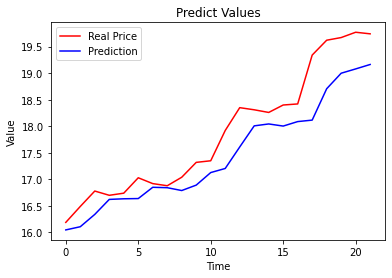

In [39]:
plt.plot(test_price, color='red', label='Real Price')
plt.plot(predict, color='blue', label='Prediction')
plt.title('Predict Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend();

In [85]:
base_train = data_train.iloc[:,1:7].values
base_test = data_test.iloc[:,1:7].values
base_train.shape, base_test.shape

((1242, 6), (22, 6))

In [86]:
base_train_norm = norm.fit_transform(base_train)

In [87]:
X, y = [], []
for i in range(90, base_train_norm.shape[0]):
    X.append(base_train_norm[i-90:i,0:6])
    y.append(base_train_norm[i,0])
X, y = np.array(X), np.array(y)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [88]:
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [89]:
class regressor_LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        
        # O primeiro input_size é o número de dimensões que cada dado tem em 
        # cada timestep. Nesse caso, são 6 dimensões, uma para cada variável.
        self.lstm1 = nn.LSTM(input_size = 6, hidden_size = 100)
        self.lstm2 = nn.LSTM(100, 50)
        self.lstm3 = nn.LSTM(50, 50, dropout = 0.3, num_layers = 2)
        self.dropout = nn.Dropout(p = 0.3)
        self.linear = nn.Linear(in_features = 50, out_features = 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        
        X = X.permute(1, 0, 2)
        X, _ = self.lstm1(X)
        X = self.dropout(X)
        X, _ = self.lstm2(X)
        X = self.dropout(X)
        X, _ = self.lstm3(X)
        
        X = X[-1]
        X = self.dropout(X)
        X = self.linear(X)
        X = self.sigmoid(X)
       
        return X

In [90]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [91]:
regressor = regressor_LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())

In [92]:
regressor.to(device)

regressor_LSTM(
  (lstm1): LSTM(6, 100)
  (lstm2): LSTM(100, 50)
  (lstm3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [93]:
# Variáveis para o callback
ES_MIN_DELTA = 1e-10
ES_PATIENCE = 10
RLR_FACTOR = 0.2
RLR_PATIENCE = 5

# Inicializando o custo inicial para usar nos callbacks
min_loss = np.inf

In [94]:
for epoch in range(200):
    running_loss = 0.
    running_mae = 0.
          
    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = regressor(inputs)
        outputs = outputs.flatten()
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
    
        running_loss += loss.item()
        mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(), 
                                  outputs.detach().cpu().numpy().flatten())
        running_mae += mae
        
        # Imprimindo os dados referentes a esse loop 
        print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: custo {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')
    
    # Imprimindo os dados referentes a essa época
    running_loss /= len(loader)
    running_mae /= len(loader)
    print('ÉPOCA {:3d} finalizada: custo {:03.6f} - MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))
    
    # CALLBACKS
    
    # Salvar o modelo
    
    if running_loss < min_loss:
        print('**Custo reduzido de {:03.6f} para {:03.6f} ... salvando checkpoint'.format(min_loss, running_loss))
        torch.save(regressor.state_dict(), 'checkpoint.pth')
        min_loss = running_loss
        es_patience = 0
        rlr_patience = 0
    else:
        print('**Custo não reduziu, não salvando checkpoint')
        
        # Os demais parâmetros só serão considerados se o custo não tiver 
               
        # Parada antecipada
        if running_loss - min_loss >= ES_MIN_DELTA:
            es_patience += 1
            if es_patience == ES_PATIENCE:
                print('--Critério de parada antecipada alcançado, parando o treinamento.')
                break
            
        # Reduzir a taxa de aprendizagem
        rlr_patience += 1
        if rlr_patience == RLR_PATIENCE:
            print('--Critério de redução de taxa de aprendizagem alcançado, reduzindo LR.')
            for param_group in optimizer.param_groups:
                param_group['lr'] *= RLR_FACTOR
            rlr_patience = 0


ÉPOCA   1 finalizada: custo 0.026922 - MAE 0.125950     
**Custo reduzido de inf para 0.026922 ... salvando checkpoint
ÉPOCA   2 finalizada: custo 0.004392 - MAE 0.050660     
**Custo reduzido de 0.026922 para 0.004392 ... salvando checkpoint
ÉPOCA   3 finalizada: custo 0.003104 - MAE 0.043129     
**Custo reduzido de 0.004392 para 0.003104 ... salvando checkpoint
ÉPOCA   4 finalizada: custo 0.002607 - MAE 0.038947     
**Custo reduzido de 0.003104 para 0.002607 ... salvando checkpoint
ÉPOCA   5 finalizada: custo 0.002544 - MAE 0.038070     
**Custo reduzido de 0.002607 para 0.002544 ... salvando checkpoint
ÉPOCA   6 finalizada: custo 0.002421 - MAE 0.037160     
**Custo reduzido de 0.002544 para 0.002421 ... salvando checkpoint
ÉPOCA   7 finalizada: custo 0.002236 - MAE 0.036074     
**Custo reduzido de 0.002421 para 0.002236 ... salvando checkpoint
ÉPOCA   8 finalizada: custo 0.001999 - MAE 0.034244     
**Custo reduzido de 0.002236 para 0.001999 ... salvando checkpoint
ÉPOCA   9 fin